Background on the TikTok scenario
Welcome to your new role at TikTok! We’re thrilled to have you on the data team!
At TikTok, our mission is to inspire creativity and bring joy. Our employees lead with curiosity and move at the speed of culture. Combined with our company's flat structure, you'll be given dynamic opportunities to make a real impact on a rapidly expanding company and grow your career.
TikTok users have the ability to report videos and comments that contain user claims. These reports identify content that needs to be reviewed by moderators. This process generates a large number of user reports that are difficult to address quickly.
TikTok is working on the development of a predictive model that can determine whether a video contains a claim or offers an opinion. With a successful prediction model, TikTok can reduce the backlog of user reports and prioritize them more efficiently.
Project background
TikTok’s data team is in the earliest stages of the claims classification project. The following tasks are needed before the team can begin the data analysis process:
A project proposal identifying the following:
Organize project tasks into milestones
Classify tasks using the PACE workflow
Identify relevant stakeholders


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
import seaborn as sns

#Data preprocessing packages
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.utils import resample

#Data modeling packages
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [ ]:
df = pd.read_excel('/content/sample_data/TikTokData.xlsx')

In [ ]:
df.size

232584

In [ ]:
df.head(3)

,AuthorID,ClaimStatus,VideoID,VideoDurationSec,VideoTranscriptionText,VerifiedStatus,AuthorBanStatus,VideoViewCount,VideoLikeCount,VideoShareCount,VideoDownloadCount,VideoCommentCount
0,9737,opinion,7031292307,58,i believe that take out restaurants have been ...,not verified,active,120.0,13.0,1.0,0.0,0.0
1,9871,opinion,2565014630,24,i understand that sea otters are born unable t...,not verified,active,3237.0,10.0,1.0,0.0,0.0
2,9928,opinion,1969382292,45,i feel that some ants can lift up to 20 times ...,not verified,active,888.0,8.0,1.0,0.0,0.0


In [ ]:
df.describe()

,AuthorID,VideoID,VideoDurationSec,VideoViewCount,VideoLikeCount,VideoShareCount,VideoDownloadCount,VideoCommentCount
count,19382.000000,1.938200e+04,19382.000000,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000
mean,9691.500000,5.627454e+09,32.421732,254708.558688,84304.636030,16735.248323,1049.429627,349.312146
std,5595.245794,2.536440e+09,16.229967,322893.280814,133420.546814,32036.174350,2004.299894,799.638865
min,1.000000,1.234959e+09,5.000000,20.000000,0.000000,0.000000,0.000000,0.000000
25%,4846.250000,3.430417e+09,18.000000,4942.500000,810.750000,115.000000,7.000000,1.000000
50%,9691.500000,5.618664e+09,32.000000,9954.500000,3403.500000,717.000000,46.000000,9.000000
75%,14536.750000,7.843960e+09,47.000000,504327.000000,125020.000000,18222.000000,1156.250000,292.000000
max,19382.000000,9.999873e+09,60.000000,999817.000000,657830.000000,256130.000000,14994.000000,9599.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19382 entries, 0 to 19381
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   AuthorID                19382 non-null  int64  
 1   ClaimStatus             19084 non-null  object 
 2   VideoID                 19382 non-null  int64  
 3   VideoDurationSec        19382 non-null  int64  
 4   VideoTranscriptionText  19084 non-null  object 
 5   VerifiedStatus          19382 non-null  object 
 6   AuthorBanStatus         19382 non-null  object 
 7   VideoViewCount          19084 non-null  float64
 8   VideoLikeCount          19084 non-null  float64
 9   VideoShareCount         19084 non-null  float64
 10  VideoDownloadCount      19084 non-null  float64
 11  VideoCommentCount       19084 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 1.8+ MB


There is no missing data according to the results from info()

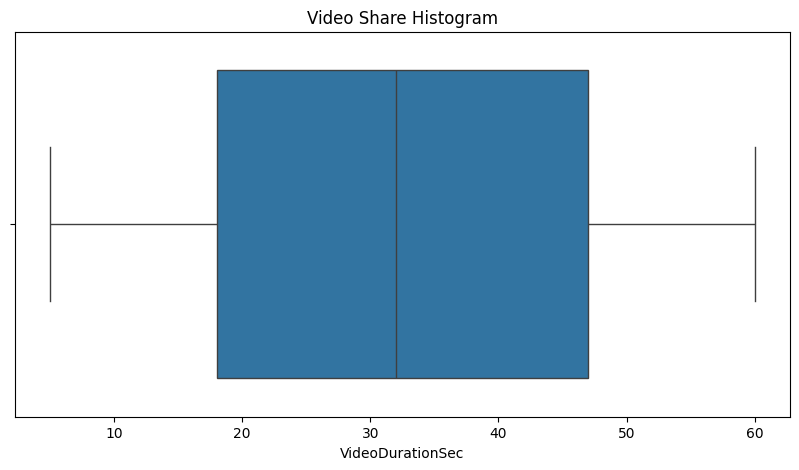

In [ ]:
plt.figure(figsize=(10,5))
#sns.histplot(df['VideoDurationSec'], bins=range(0,26,1) )
sns.boxplot(data=None, x=df['VideoDurationSec'], fliersize=1)
plt.title("Video Share Histogram");
plt.show()

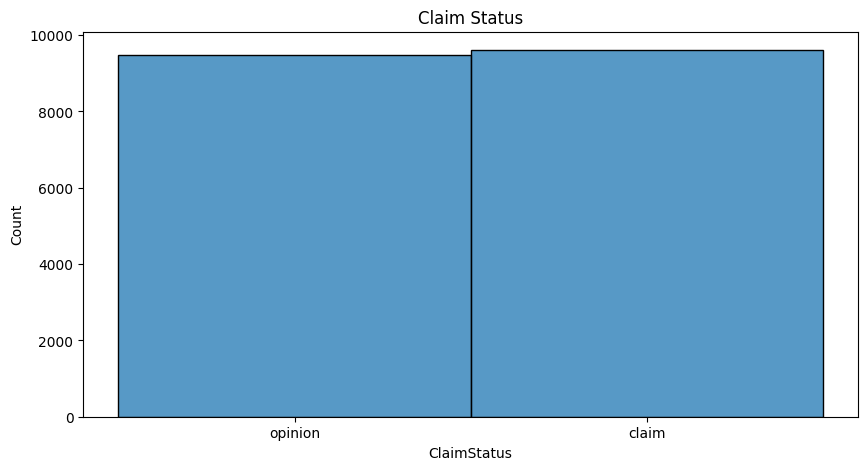

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(df['ClaimStatus'])#, bins=range(1,20,1000))
plt.title('Claim Status')
plt.show()

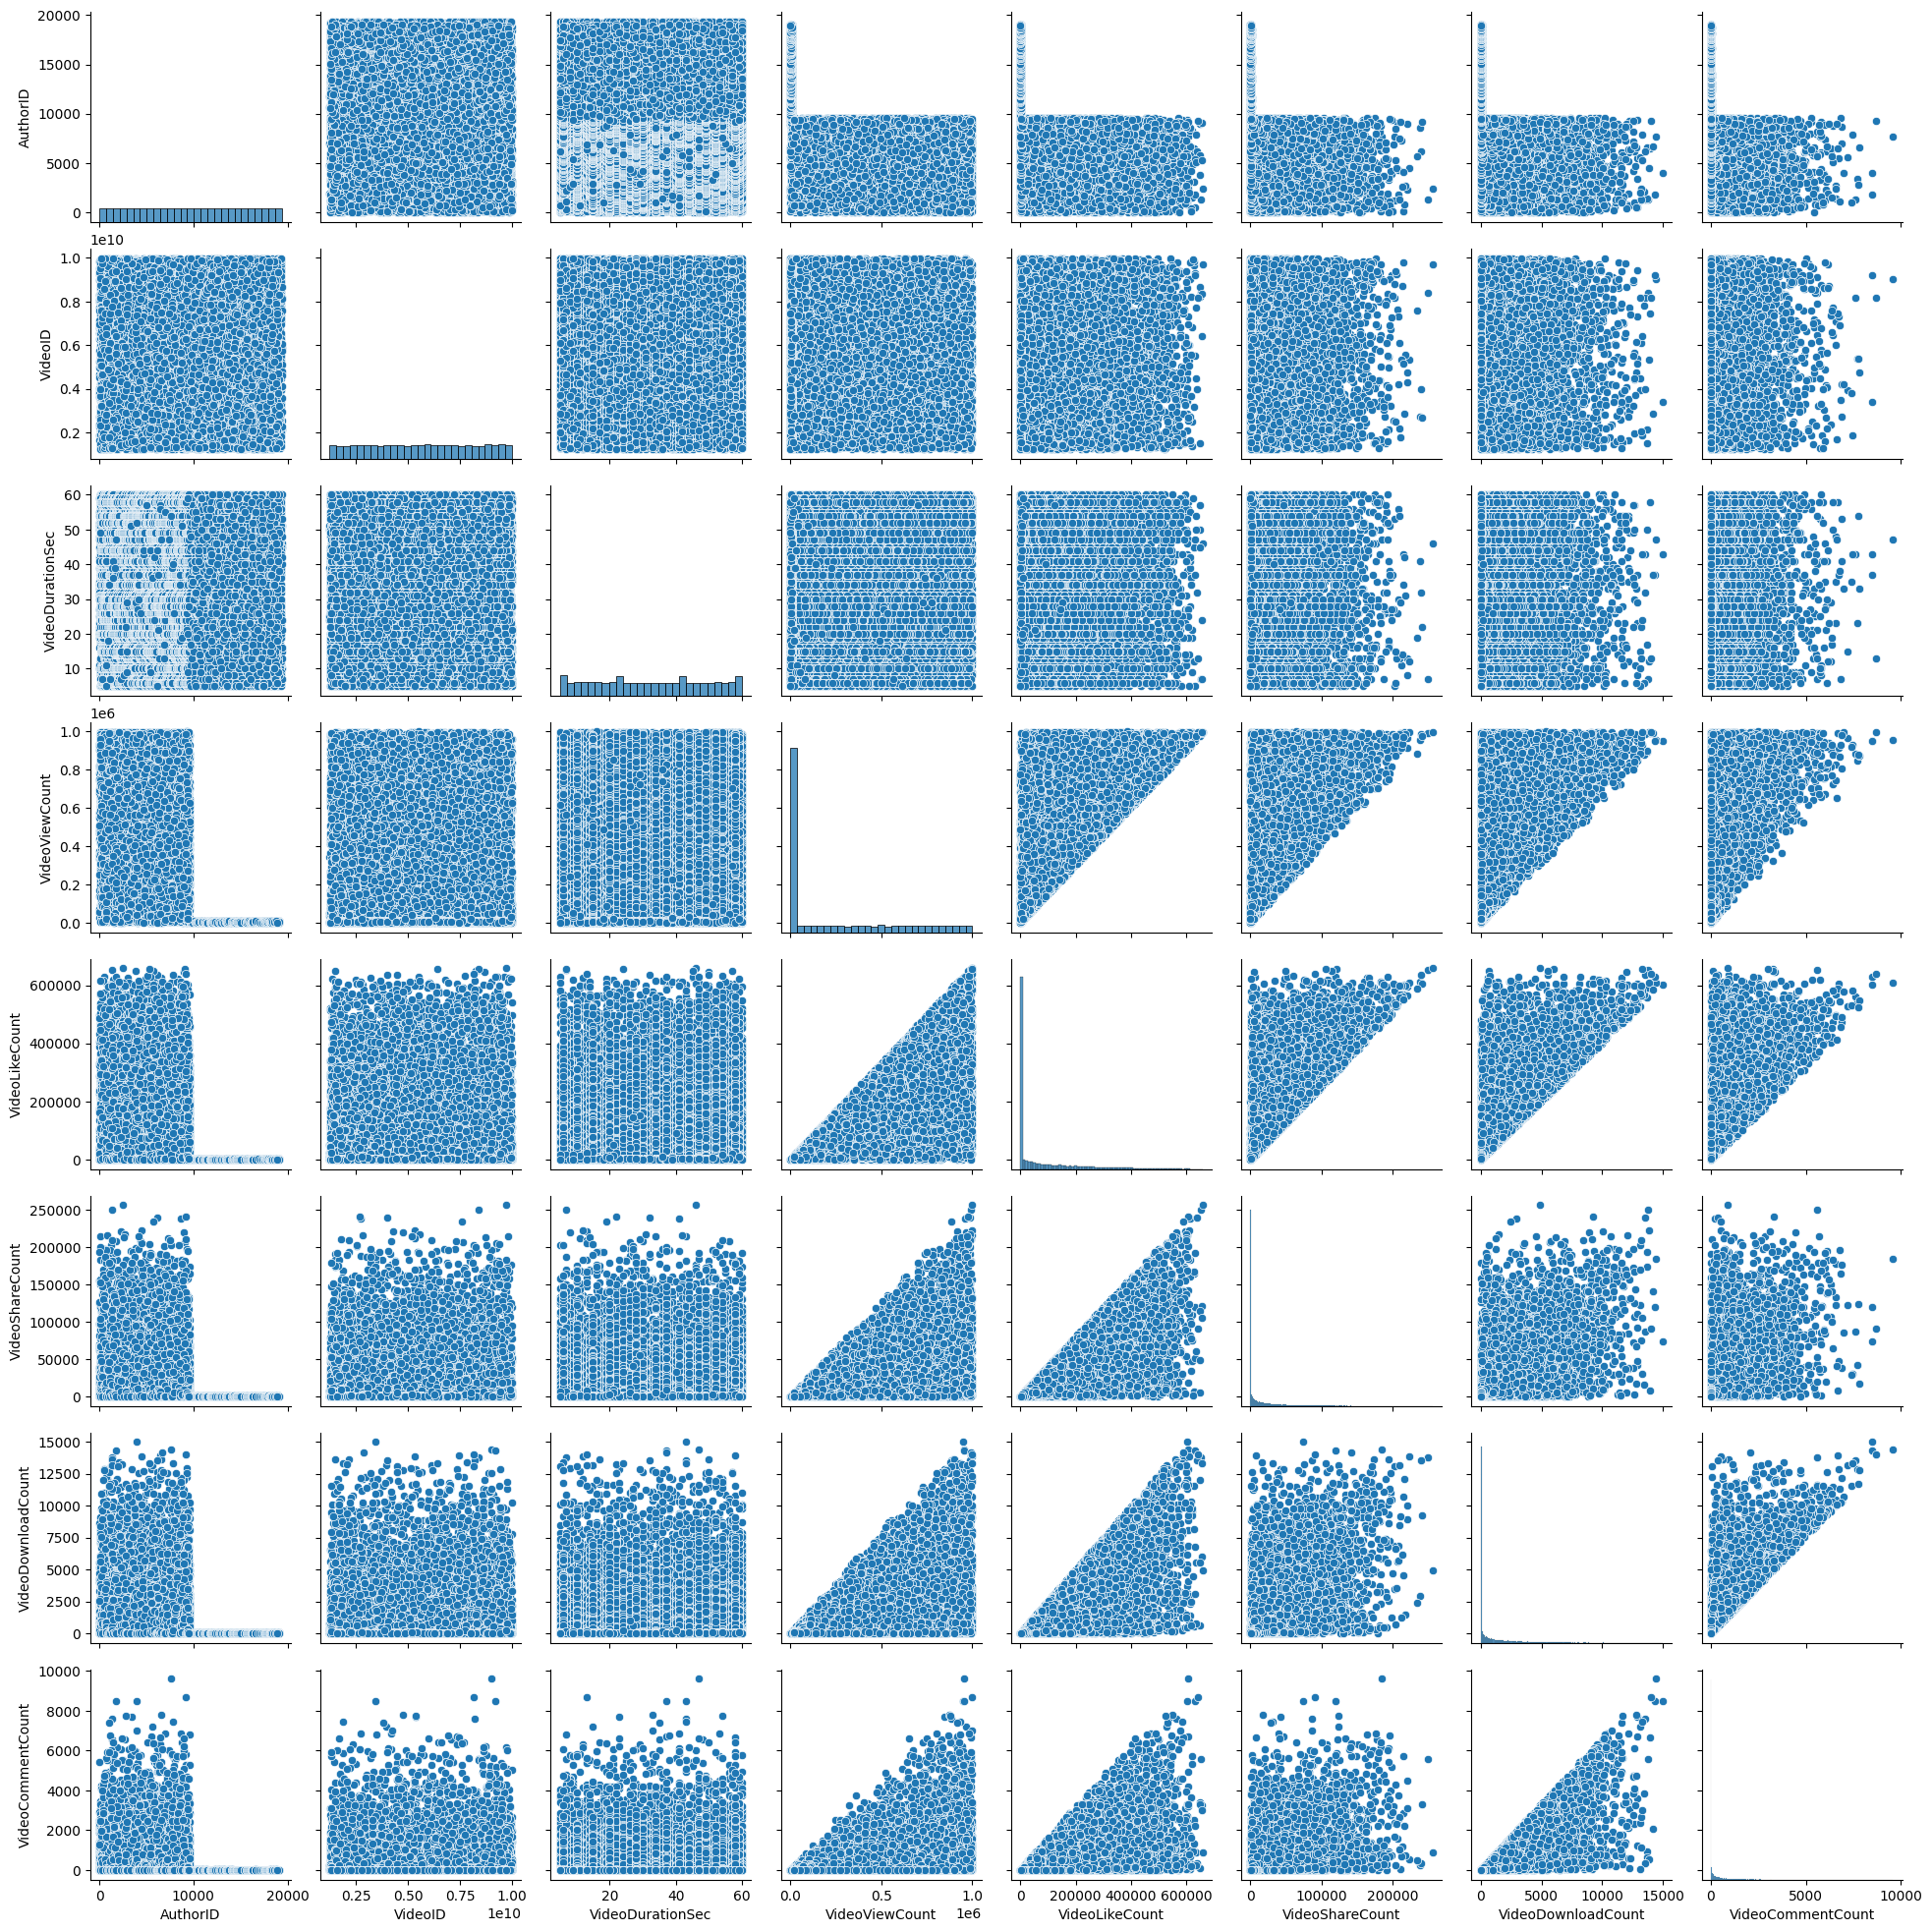

In [ ]:
sns.pairplot(df)

In [ ]:
df['VerifiedStatus'].value_counts()

,count
VerifiedStatus,
not verified,18142
verified,1240


In [ ]:
df['ClaimStatus'].value_counts()

,count
ClaimStatus,
claim,9608
opinion,9476


In [ ]:
df.shape

(19382, 12)

In [ ]:
ax = sns.histplot(df['VideoLikeCount'], bins=range(0,(7*10**5+1),10**5))
labels = [0] + [str(i) + 'k' for i in range(100, 701, 100)]
ax.set_xticks(range(0, 7*10**5), labels=labels )
plt.title('Video like count histogram');


KeyboardInterrupt: 

Error in callback <function _draw_all_if_interactive at 0x78b1ab9624d0> (for post_execute):


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x78b1ab9611b0> (for post_execute):


KeyboardInterrupt: 

Text(0.5, 1.0, 'Claims by verification status histogram')

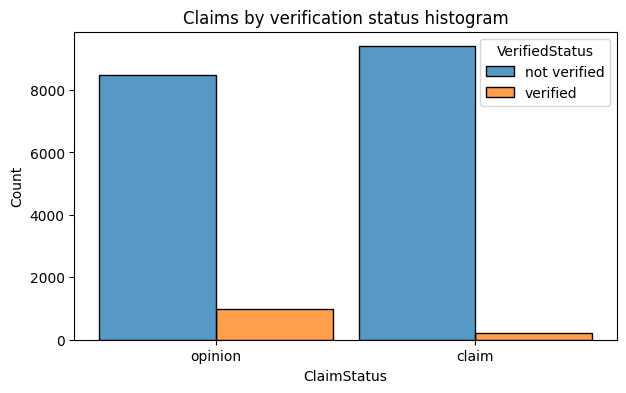

In [ ]:
plt.figure(figsize=(7,4))
sns.histplot(data = df, x='ClaimStatus', hue='VerifiedStatus',multiple='dodge', shrink=0.9)
plt.title('Claims by verification status histogram')

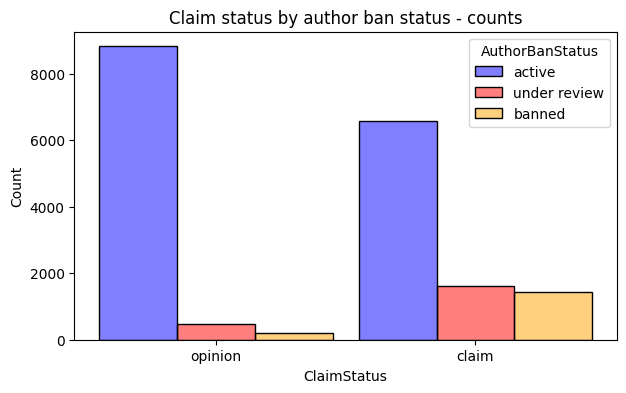

In [ ]:
fig = plt.figure(figsize=(7,4))
sns.histplot(df, x='ClaimStatus', hue='AuthorBanStatus',
             multiple='dodge',
             hue_order=['active', 'under review', 'banned'],
             shrink=0.9,
             palette={'active':'blue', 'under review':'red', 'banned':'orange'},
             alpha=0.5)
plt.title('Claim status by author ban status - counts');

<ipython-input-38-26e5fe984a76>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=BanStatusCount,


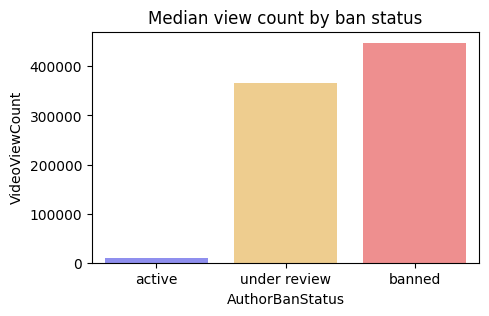

In [ ]:
BanStatusCount = df.groupby(['AuthorBanStatus']).median(numeric_only=True).reset_index()

fig = plt.figure(figsize=(5,3))
sns.barplot(data=BanStatusCount,
x='AuthorBanStatus',
y='VideoViewCount',
order=['active','under review','banned'],
palette={'active':'blue','under review':'orange','banned':'red' },
alpha=0.5)
plt.title('Median view count by ban status');


In [ ]:
df.groupby('ClaimStatus')['VideoViewCount'].median()

,VideoViewCount
ClaimStatus,
claim,501555.0
opinion,4953.0


Text(0.5, 1.0, 'Total views by video claim status')

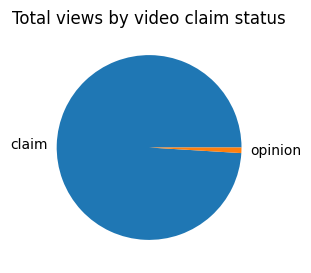

In [ ]:
fig = plt.figure(figsize=(3,3))
plt.pie(df.groupby('ClaimStatus')['VideoViewCount'].sum(), labels=['claim', 'opinion'])
plt.title('Total views by video claim status')

In [ ]:
count_cols = ['VideoViewCount',
              'VideoLikeCount',
              'VideoShareCount',
              'VideoDownloadCount',
              'VideoCommentCount']
for column in count_cols:
  q1 = df[column].quantile(0.25)
  q3 = df[column].quantile(0.75)
  iqr = q3 - q1
  median = df[column].median()
  outlier_upper_threshold = q3 + 1.5 * iqr
  outlier_lower_threshold = q1 - 1.5 * iqr

  #Count the number of values that exceed the outlier threshold
  outlier_count_upper = (df[column] > outlier_upper_threshold).sum()
  outlier_count_lower = (df[column] < outlier_lower_threshold).sum()
  print(f'Number of outliers upper, {column}:', outlier_count_upper)
print(f'Number of outliers lower, {column}:', outlier_count_lower)


Number of outliers upper, VideoViewCount: 0
Number of outliers upper, VideoLikeCount: 1726
Number of outliers upper, VideoShareCount: 2508
Number of outliers upper, VideoDownloadCount: 2450
Number of outliers upper, VideoCommentCount: 2789
Number of outliers lower, VideoCommentCount: 0


In [ ]:
df.isna().sum()


,0
AuthorID,0
ClaimStatus,298
VideoID,0
VideoDurationSec,0
VideoTranscriptionText,298
VerifiedStatus,0
AuthorBanStatus,0
VideoViewCount,298
VideoLikeCount,298
VideoShareCount,298


In [ ]:
df = df.dropna(axis=0)

A/B Testing
Null Hypothesis: There is no difference in number of views between Tik TOk videos posted by verifed accounts and Tik Tok videos posted by unverified accounts.
Alternate Hypothesis: There is difference in number of views between verified accounts and unverified accounts.
Conduct a two sample t-test.**bold text**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19084 entries, 0 to 19381
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   AuthorID                19084 non-null  int64  
 1   ClaimStatus             19084 non-null  object 
 2   VideoID                 19084 non-null  int64  
 3   VideoDurationSec        19084 non-null  int64  
 4   VideoTranscriptionText  19084 non-null  object 
 5   VerifiedStatus          19084 non-null  object 
 6   AuthorBanStatus         19084 non-null  object 
 7   VideoViewCount          19084 non-null  float64
 8   VideoLikeCount          19084 non-null  float64
 9   VideoShareCount         19084 non-null  float64
 10  VideoDownloadCount      19084 non-null  float64
 11  VideoCommentCount       19084 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 1.9+ MB


In [ ]:
df['ClaimStatus'] = OneHotEncoder(drop='first').fit_transform(df[['ClaimStatus']]).toarray()

In [ ]:
df.head(3)

,AuthorID,ClaimStatus,VideoID,VideoDurationSec,VideoTranscriptionText,VerifiedStatus,AuthorBanStatus,VideoViewCount,VideoLikeCount,VideoShareCount,VideoDownloadCount,VideoCommentCount
0,9737,1.0,7031292307,58,i believe that take out restaurants have been ...,not verified,active,120.0,13.0,1.0,0.0,0.0
1,9871,1.0,2565014630,24,i understand that sea otters are born unable t...,not verified,active,3237.0,10.0,1.0,0.0,0.0
2,9928,1.0,1969382292,45,i feel that some ants can lift up to 20 times ...,not verified,active,888.0,8.0,1.0,0.0,0.0


In [ ]:
df.groupby("VerifiedStatus")["ClaimStatus"].mean()

,ClaimStatus
VerifiedStatus,
not verified,0.467699
verified,0.799194


In [ ]:
df.groupby("VerifiedStatus")["VideoCommentCount"].mean()

,VideoCommentCount
VerifiedStatus,
not verified,363.700514
verified,134.877500


In [ ]:
df.head(2)

,AuthorID,ClaimStatus,VideoID,VideoDurationSec,VideoTranscriptionText,VerifiedStatus,AuthorBanStatus,VideoViewCount,VideoLikeCount,VideoShareCount,VideoDownloadCount,VideoCommentCount
0,9737,opinion,7031292307,58,i believe that take out restaurants have been ...,not verified,active,120.0,13.0,1.0,0.0,0.0
1,9871,opinion,2565014630,24,i understand that sea otters are born unable t...,not verified,active,3237.0,10.0,1.0,0.0,0.0


In [ ]:
from scipy import stats
#Conduct a two-sample t-test to compare means

not_verified = df[df["VerifiedStatus"] == "not verified"]["ClaimStatus"]
verified = df[df["VerifiedStatus"] == "verified"]["ClaimStatus"]

#Implement a t-test using the two samples
stats.ttest_ind(a=not_verified, b=verified,equal_var=False)


TtestResult(statistic=nan, pvalue=nan, df=nan)

Since the p-value is extremely small (much smaller than significant level 5% ) the null hypothesis is rejected. We conclude that there is a statistically significance difference between the claim status between verified and unverified accounts on Tik Tok.

Since A/B testing proved that verification status impacts claim status. We'll explore how other variables impact verification status.
We'll use logical regression to predict the verification status.


In [ ]:
df.head(2)

,AuthorID,ClaimStatus,VideoID,VideoDurationSec,VideoTranscriptionText,VerifiedStatus,AuthorBanStatus,VideoViewCount,VideoLikeCount,VideoShareCount,VideoDownloadCount,VideoCommentCount
0,9737,opinion,7031292307,58,i believe that take out restaurants have been ...,not verified,active,120.0,13.0,1.0,0.0,0.0
1,9871,opinion,2565014630,24,i understand that sea otters are born unable t...,not verified,active,3237.0,10.0,1.0,0.0,0.0


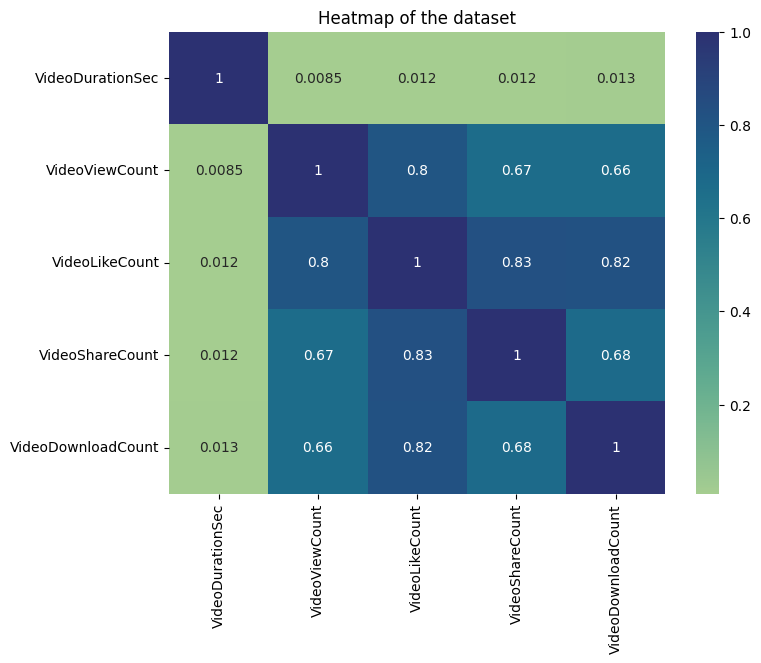

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(
    df[['VideoDurationSec','AuthorBanStatus','VideoViewCount',
        'VideoLikeCount','VideoShareCount','VideoDownloadCount']]
    .corr(numeric_only = True),
    annot=True,
    cmap="crest")
plt.title("Heatmap of the dataset")
plt.show()




---

One of the assumptions of logical regression is that there is no severe multicollinearity among the features. Since there is strong correlation between the VideoViewCount and VideoLikeCount of 86%. We'll exclude VideoLikeCount and have the following features:

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19382 entries, 0 to 19381
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   AuthorID                19382 non-null  int64  
 1   ClaimStatus             19084 non-null  object 
 2   VideoID                 19382 non-null  int64  
 3   VideoDurationSec        19382 non-null  int64  
 4   VideoTranscriptionText  19084 non-null  object 
 5   VerifiedStatus          19382 non-null  object 
 6   AuthorBanStatus         19382 non-null  object 
 7   VideoViewCount          19084 non-null  float64
 8   VideoLikeCount          19084 non-null  float64
 9   VideoShareCount         19084 non-null  float64
 10  VideoDownloadCount      19084 non-null  float64
 11  VideoCommentCount       19084 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 1.8+ MB


In [ ]:
df.head(2)

,AuthorID,ClaimStatus,VideoID,VideoDurationSec,VideoTranscriptionText,VerifiedStatus,AuthorBanStatus,VideoViewCount,VideoLikeCount,VideoShareCount,VideoDownloadCount,VideoCommentCount
0,9737,opinion,7031292307,58,i believe that take out restaurants have been ...,not verified,active,120.0,13.0,1.0,0.0,0.0
1,9871,opinion,2565014630,24,i understand that sea otters are born unable t...,not verified,active,3237.0,10.0,1.0,0.0,0.0


In [ ]:
#Balance datasets
#Use resampling to create class balance in the outcome variable

#Identify majority and minority datapoints
df_majority = df[df["VerifiedStatus"] == "not verified"]
df_minority = df[df["VerifiedStatus"] == "verified"]

#Upsample the minority class(which is "verified")
df_minority_upsampled = resample(df_minority,
                                 replace = True,
                                 n_samples = len(df_majority),
                                 random_state = 0)


In [ ]:
#Combine majority class with upsampled minority
df_upsampled = pd.concat([df_majority, df_minority_upsampled]).reset_index(drop=True)

df_upsampled["VerifiedStatus"].value_counts()

,count
VerifiedStatus,
not verified,18142
verified,18142


In [ ]:
# Extract the length of each `VideoTranscriptionText` and add this as a column to the dataframe
df_upsampled["TextLength"] = df_upsampled["VideoTranscriptionText"].apply(func=lambda text: len(str(text)))

In [ ]:
df_upsampled.isnull().sum()

,0
AuthorID,0
ClaimStatus,841
VideoID,0
VideoDurationSec,0
VideoTranscriptionText,841
VerifiedStatus,0
AuthorBanStatus,0
VideoViewCount,841
VideoLikeCount,841
VideoShareCount,841


In [ ]:
df_upsampled = df_upsampled.dropna(axis=0)

In [ ]:
df_upsampled.isnull().sum()

,0
AuthorID,0
ClaimStatus,0
VideoID,0
VideoDurationSec,0
VideoTranscriptionText,0
VerifiedStatus,0
AuthorBanStatus,0
VideoViewCount,0
VideoLikeCount,0
VideoShareCount,0


In [ ]:
df_upsampled[["VerifiedStatus", "VideoTranscriptionText"]].groupby(by="VerifiedStatus")[["VideoTranscriptionText"]].agg(func=lambda array: np.mean([len(str(text)) for text in array]))

,VideoTranscriptionText
VerifiedStatus,
not verified,89.401141
verified,84.594738


In [ ]:
df_upsampled.head(2)

,AuthorID,ClaimStatus,VideoID,VideoDurationSec,VideoTranscriptionText,VerifiedStatus,AuthorBanStatus,VideoViewCount,VideoLikeCount,VideoShareCount,VideoDownloadCount,VideoCommentCount,TextLength
0,9737,opinion,7031292307,58,i believe that take out restaurants have been ...,not verified,active,120.0,13.0,1.0,0.0,0.0,77
1,9871,opinion,2565014630,24,i understand that sea otters are born unable t...,not verified,active,3237.0,10.0,1.0,0.0,0.0,52


In [ ]:
df_upsampled['AuthorBanStatus'].unique()

array(['active', 'banned', 'under review'], dtype=object)

In [ ]:
df_upsampled = df_upsampled.drop_duplicates()

In [ ]:
df_upsampled.isnull().sum()

,0
AuthorID,0
ClaimStatus,0
VideoID,0
VideoDurationSec,0
VideoTranscriptionText,0
VerifiedStatus,0
AuthorBanStatus,0
VideoViewCount,0
VideoLikeCount,0
VideoShareCount,0


In [ ]:
df_upsampled['ClaimStatus'] = OneHotEncoder(drop='first').fit_transform(df_upsampled[['ClaimStatus']]).toarray()

In [ ]:
df_upsampled['AuthorBanStatus'].unique()

array(['active', 'banned', 'under review'], dtype=object)

In [ ]:
#df_upsampled['AuthorBanStatus'] = OneHotEncoder(drop='first').fit_transform(df_upsampled[['AuthorBanStatus']]).toarray()

In [ ]:
#df_upsampled['AuthorBanStatus'].unique()

array([0., 1.])

In [ ]:
#df_upsampled.head(5)

,AuthorID,ClaimStatus,VideoID,VideoDurationSec,VideoTranscriptionText,VerifiedStatus,AuthorBanStatus,VideoViewCount,VideoLikeCount,VideoShareCount,VideoDownloadCount,VideoCommentCount,TextLength
0,9737,1.0,7031292307,58,i believe that take out restaurants have been ...,not verified,0.0,120.0,13.0,1.0,0.0,0.0,77
1,9871,1.0,2565014630,24,i understand that sea otters are born unable t...,not verified,0.0,3237.0,10.0,1.0,0.0,0.0,52
2,9928,1.0,1969382292,45,i feel that some ants can lift up to 20 times ...,not verified,0.0,888.0,8.0,1.0,0.0,0.0,67
3,9996,1.0,9896587326,48,my family thinks that the rubik's cube is the ...,not verified,0.0,3235.0,19.0,1.0,0.0,0.0,78
4,10051,1.0,7684375277,11,my family thinks that penguins can jump as hig...,not verified,0.0,759.0,5.0,1.0,0.0,0.0,68


In [ ]:
#df_upsampled['ClaimStatus'].unique()

array([1., 0.])

In [ ]:
#Select Variables
#Set Y and X

#Ourcome variable
y = df_upsampled[['VerifiedStatus']]


In [ ]:
y.head(2)

,VerifiedStatus
0,not verified
1,not verified


In [ ]:
#y['VerifiedStatus'] = OneHotEncoder(drop='first').fit_transform(y['VerifiedStatus']).toarray()

KeyError: 'VerfiedStatus'

In [ ]:
X = df_upsampled[['VideoDurationSec', 'ClaimStatus','AuthorBanStatus','VideoViewCount','VideoShareCount', 'VideoDownloadCount','VideoCommentCount']]

In [ ]:
X.head(2)

,VideoDurationSec,ClaimStatus,AuthorBanStatus,VideoViewCount,VideoShareCount,VideoDownloadCount,VideoCommentCount
0,58,1.0,active,120.0,1.0,0.0,0.0
1,24,1.0,active,3237.0,1.0,0.0,0.0


In [ ]:
#df_upsampled.corr(numeric_only=True)

,AuthorID,ClaimStatus,VideoID,VideoDurationSec,AuthorBanStatus,VideoViewCount,VideoLikeCount,VideoShareCount,VideoDownloadCount,VideoCommentCount,TextLength
AuthorID,1.000000,0.866005,-0.003590,-0.000145,-0.203028,-0.668047,-0.540852,-0.451713,-0.447729,-0.377445,-0.226844
ClaimStatus,0.866005,1.000000,-0.000962,-0.003914,-0.230605,-0.768170,-0.619399,-0.512067,-0.513217,-0.430487,-0.305928
VideoID,-0.003590,-0.000962,1.000000,0.008460,-0.001263,0.000217,0.000236,-0.002721,0.002155,0.005336,0.000723
VideoDurationSec,-0.000145,-0.003914,0.008460,1.000000,-0.001891,0.008481,0.011567,0.011560,0.013078,0.000615,-0.001580
AuthorBanStatus,-0.203028,-0.230605,-0.001263,-0.001891,1.000000,0.181205,0.157652,0.126739,0.127814,0.101693,0.077464
VideoViewCount,-0.668047,-0.768170,0.000217,0.008481,0.181205,1.000000,0.804322,0.665635,0.664222,0.554172,0.230212
VideoLikeCount,-0.540852,-0.619399,0.000236,0.011567,0.157652,0.804322,1.000000,0.825789,0.823554,0.687185,0.180193
VideoShareCount,-0.451713,-0.512067,-0.002721,0.011560,0.126739,0.665635,0.825789,1.000000,0.679910,0.574632,0.147223
VideoDownloadCount,-0.447729,-0.513217,0.002155,0.013078,0.127814,0.664222,0.823554,0.679910,1.000000,0.832464,0.146382
VideoCommentCount,-0.377445,-0.430487,0.005336,0.000615,0.101693,0.554172,0.687185,0.574632,0.832464,1.000000,0.129659


In [ ]:
#Train-Test split
#Split the data into trianing and testing data sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((14313, 7), (4771, 7), (14313, 1), (4771, 1))

In [ ]:
df.size

232584

In [ ]:
X_train.dtypes

,0
VideoDurationSec,int64
ClaimStatus,float64
AuthorBanStatus,float64
VideoViewCount,float64
VideoShareCount,float64
VideoDownloadCount,float64
VideoCommentCount,float64


In [ ]:
X_train_to_encode = X_train[["AuthorBanStatus"]]
X_train_to_encode.head(4)

,AuthorBanStatus
8054,under review
18714,active
7363,under review
2856,active


In [ ]:
X_encoder = OneHotEncoder(drop='first', sparse_output=False)

In [ ]:
X_train_encoded = X_encoder.fit_transform(X_train_to_encode)

In [ ]:
X_encoder.get_feature_names_out()

array(['AuthorBanStatus_banned', 'AuthorBanStatus_under review'],
      dtype=object)

In [ ]:
X_train_encoded

array([[0., 1.],
       [0., 0.],
       [0., 1.],
       ...,
       [0., 0.],
       [0., 0.],
       [0., 0.]])

In [ ]:
X_train_encoded_df = pd.DataFrame(data=X_train_encoded, columns=X_encoder.get_feature_names_out() )
X_train_encoded_df.head()

,AuthorBanStatus_banned,AuthorBanStatus_under review
0,0.0,1.0
1,0.0,0.0
2,0.0,1.0
3,0.0,0.0
4,0.0,0.0


In [ ]:
X_train.drop(columns=["AuthorBanStatus"]).head(5)

,VideoDurationSec,ClaimStatus,VideoViewCount,VideoShareCount,VideoDownloadCount,VideoCommentCount
8054,31,0.0,628094.0,36258.0,1995.0,426.0
18714,30,1.0,1782.0,1.0,1.0,0.0
7363,47,0.0,696604.0,17079.0,6860.0,2301.0
2856,37,1.0,2327.0,225.0,15.0,0.0
16843,44,0.0,373059.0,21772.0,4073.0,2106.0


In [ ]:
X_train_final = pd.concat([X_train.drop(columns=["AuthorBanStatus"]).reset_index(drop=True), X_train_encoded_df], axis=1)

X_train_final.head()

,VideoDurationSec,ClaimStatus,VideoViewCount,VideoShareCount,VideoDownloadCount,VideoCommentCount,AuthorBanStatus_banned,AuthorBanStatus_under review
0,31,0.0,628094.0,36258.0,1995.0,426.0,0.0,1.0
1,30,1.0,1782.0,1.0,1.0,0.0,0.0,0.0
2,47,0.0,696604.0,17079.0,6860.0,2301.0,0.0,1.0
3,37,1.0,2327.0,225.0,15.0,0.0,0.0,0.0
4,44,0.0,373059.0,21772.0,4073.0,2106.0,0.0,0.0


In [ ]:
y_train


,VerifiedStatus
8054,not verified
18714,verified
7363,not verified
2856,not verified
16843,not verified
...,...
9239,not verified
13381,not verified
10103,not verified
11057,not verified


In [ ]:
y_encoder = OneHotEncoder(drop='first', sparse_output=False)

In [ ]:
y_train_final = y_encoder.fit_transform(y_train.values.reshape(-1, 1)).ravel()
y_train_final

array([0., 1., 0., ..., 0., 0., 0.])

In [ ]:
#

In [ ]:
#Encode categorical values in test set.
X_test_to_encode = X_test[[ "AuthorBanStatus"]]

In [ ]:
X_test_to_encode.head()

,AuthorBanStatus
3695,active
11753,active
7618,under review
12986,active
875,active


In [ ]:
X_test_encoded = X_encoder.transform(X_test_to_encode)

X_test_encoded

array([[0., 0.],
       [0., 0.],
       [0., 1.],
       ...,
       [0., 0.],
       [0., 1.],
       [0., 0.]])

In [ ]:
X_test_encoded_df = pd.DataFrame(data=X_test_encoded, columns=X_encoder.get_feature_names_out())

X_test_encoded_df.head()

,AuthorBanStatus_banned,AuthorBanStatus_under review
0,0.0,0.0
1,0.0,0.0
2,0.0,1.0
3,0.0,0.0
4,0.0,0.0


In [ ]:
X_test.drop(columns=["AuthorBanStatus"]).head()

,VideoDurationSec,ClaimStatus,VideoViewCount,VideoShareCount,VideoDownloadCount,VideoCommentCount
3695,29,1.0,4541.0,216.0,8.0,1.0
11753,35,0.0,591605.0,51003.0,1160.0,724.0
7618,14,0.0,483502.0,68558.0,4054.0,1847.0
12986,43,0.0,317755.0,16389.0,1126.0,729.0
875,27,0.0,2245.0,35.0,0.0,0.0


In [ ]:
X_test_final = pd.concat([X_test.drop(columns=["AuthorBanStatus"]).reset_index(drop=True),X_test_encoded_df], axis=1)

X_test_final.head()

,VideoDurationSec,ClaimStatus,VideoViewCount,VideoShareCount,VideoDownloadCount,VideoCommentCount,AuthorBanStatus_banned,AuthorBanStatus_under review
0,29,1.0,4541.0,216.0,8.0,1.0,0.0,0.0
1,35,0.0,591605.0,51003.0,1160.0,724.0,0.0,0.0
2,14,0.0,483502.0,68558.0,4054.0,1847.0,0.0,1.0
3,43,0.0,317755.0,16389.0,1126.0,729.0,0.0,0.0
4,27,0.0,2245.0,35.0,0.0,0.0,0.0,0.0


In [ ]:
#Build Model

log_clf = LogisticRegression(random_state=0,max_iter=800).fit(X_train_final, y_train_final)

In [ ]:
y_pred = log_clf.predict(X_test_final)

In [ ]:
y_pred

array([0., 0., 0., ..., 0., 0., 0.])

In [ ]:
y_test

,VerifiedStatus
3695,not verified
11753,not verified
7618,not verified
12986,not verified
875,not verified
...,...
4493,not verified
12704,not verified
1173,not verified
7179,not verified


In [ ]:
y_test_final = y_encoder.transform(y_test.values.reshape(-1,1)).ravel()

y_test_final


array([0., 0., 0., ..., 0., 0., 0.])

In [ ]:
# Get shape of each training and testing set
X_train_final.shape, y_train_final.shape, X_test_final.shape, y_test_final.shape

((14313, 8), (14313,), (4771, 8), (4771,))

array([0., 0., 0., ..., 0., 0., 0.])

AttributeError: 'numpy.ndarray' object has no attribute 'values'

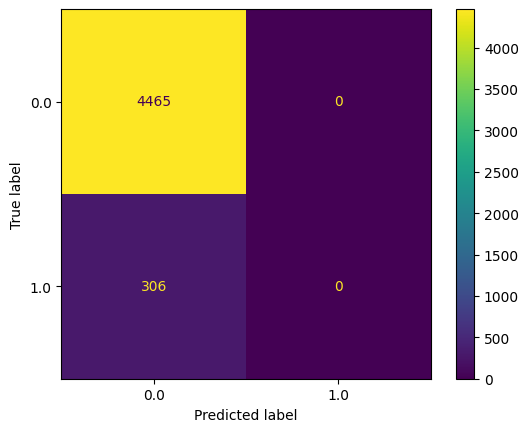

In [ ]:
#Visualize Model Results
log_cm = confusion_matrix(y_test_final, y_pred, labels=log_clf.classes_ )

#Display confusion matrix
log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm, display_labels = log_clf.classes_)

#Plot confusion matrix
log_disp.plot()

plt.show()

In [ ]:
target_labels = ["verified", "non verified"]
print(classification_report(y_test_final, y_pred, target_names = target_labels))

              precision    recall  f1-score   support

    verified       0.94      1.00      0.97      4465
non verified       0.00      0.00      0.00       306

    accuracy                           0.94      4771
   macro avg       0.47      0.50      0.48      4771
weighted avg       0.88      0.94      0.90      4771



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
#Interpreting model coeffiecients
pd.DataFrame(data={"Feature Name":log_clf.feature_names_in_, "Model Coefficient":log_clf.coef_[0]})


,Feature Name,Model Coefficient
0,VideoDurationSec,-1.826771e-03
1,ClaimStatus,1.637828e+00
2,VideoViewCount,4.591687e-08
3,VideoShareCount,3.325972e-06
4,VideoDownloadCount,-1.627719e-04
5,VideoCommentCount,3.265592e-04
6,AuthorBanStatus_banned,-4.267319e-01
7,AuthorBanStatus_under review,-9.812263e-02
